# Log Transformation

In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn  as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

# Q-Q plot ko plot krne ke liye yeah library hmne import ki hai.
import scipy.stats as stats



In [23]:
df = pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\Dataset\train_titanic_dataset.csv", usecols = ['Age','Fare','Survived'])
df.sample(5)

,Survived,Age,Fare
798,0,30.0,7.2292
58,1,5.0,27.7500
175,0,18.0,7.8542
601,0,NaN,7.8958
555,0,62.0,26.5500


# lets check the missing values

In [24]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [25]:
# lets fill the null values with mean values
df['Age'].fillna(df['Age'].mean(),inplace = True)

In [26]:
df.isnull().sum()
# no misiing values

Survived    0
Age         0
Fare        0
dtype: int64

In [27]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

# Trin_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=42)

# Q-Q PLOT FOR AGE CLASS

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


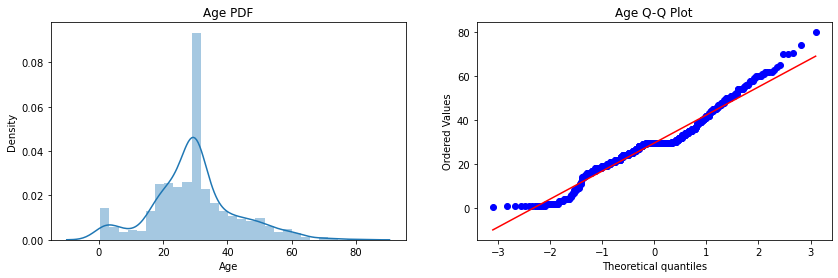

In [29]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'],dist = 'norm',plot = plt)
# this code is very much imp
plt.title('Age Q-Q Plot')
plt.show()

# QQ PLOT FOR FARE CLASS

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


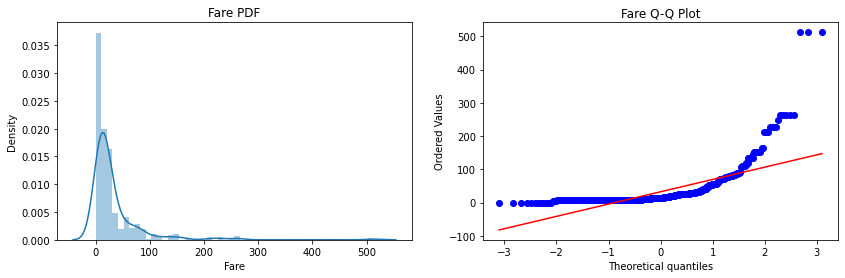

In [30]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist = 'norm',plot = plt)
# this code is very much imp
plt.title('Fare Q-Q Plot')
plt.show()

#### aapko dikh rha hai ki fare vaala ho right skwed hai toh log transform krna hai but abhi filhal ase hi
#### dry algo lagake dekhte hai kaisa run ho rha hai toh.


In [31]:
clf = DecisionTreeClassifier()
clf2 = LogisticRegression()

# accuracy checking

In [32]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_test)

print('accuracy_score for D.T:-', accuracy_score(y_test,y_pred))
print('accuracy_score for L.R:-', accuracy_score(y_test,y_pred2))

accuracy_score for D.T:- 0.6703910614525139
accuracy_score for L.R:- 0.6480446927374302


# what if i apply the log transformer then accuracy will improve

In [39]:
# function transformation
trf = FunctionTransformer(func=np.log1p)

In [40]:
x_train_transform = trf.fit_transform(x_train)
x_test_transform  = trf.transform(x_test)

In [41]:
l1 = LogisticRegression()
d2 = DecisionTreeClassifier()

In [42]:
l1.fit(x_train_transform,y_train)
d2.fit(x_train_transform ,y_train)

DecisionTreeClassifier()

In [45]:
y_pred = l1.predict(x_test_transform)
y_pred2 = d2.predict(x_test_transform)

In [46]:
print('accuracy_Score L.R:',accuracy_score(y_test,y_pred))
print('accuracy_score D.T:',accuracy_score(y_test,y_pred2))

accuracy_Score L.R: 0.6815642458100558
accuracy_score D.T: 0.664804469273743


# lets cross_validate to verify this result is true or not

In [47]:
x_transform = trf.fit_transform(x)

In [48]:
l2 = LogisticRegression()
d2 = DecisionTreeClassifier()

In [51]:
print("L.R:",np.mean(cross_val_score(l2,x_transform,y,scoring = 'accuracy',cv=10)))
print("D.T:",np.mean(cross_val_score(d2,x_transform,y,scoring = 'accuracy',cv=10)))

L.R: 0.678027465667915
D.T: 0.6622471910112361


### OBESERVATION:- D.T par kuch asar nahi gira but l.r par asar gira

### chalo dekhte hai kitna asar gira cross verify krte hai graph plot krke.


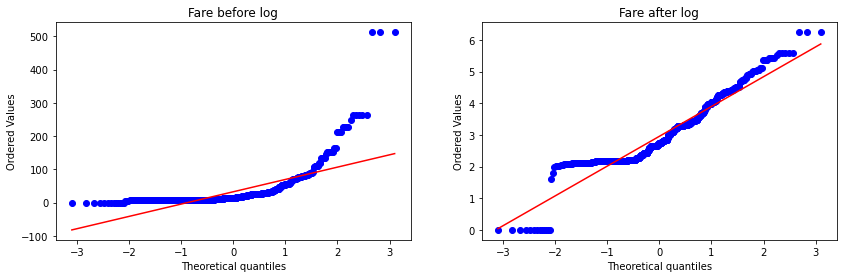

In [55]:
plt.figure(figsize = (14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('Fare before log')

plt.subplot(122)
stats.probplot(x_train_transform['Fare'], dist='norm',plot=plt)
plt.title('Fare after log')

plt.show()

# lets see to the age

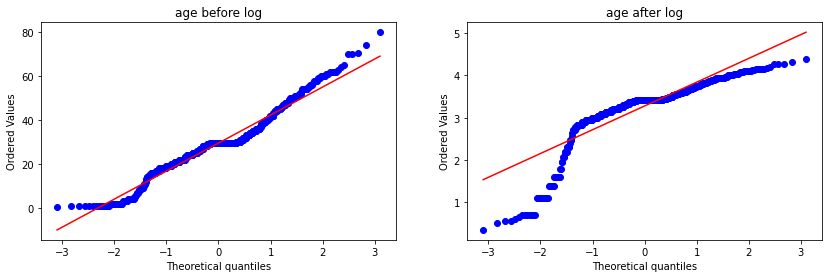

In [57]:
plt.figure(figsize = (14,4))

plt.subplot(121)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('age before log')

plt.subplot(122)
stats.probplot(x_train_transform['Age'], dist='norm',plot=plt)
plt.title('age after log')

plt.show()

### observation:- phle jyad aacha tha abhi kharab ho gya age vala column kyoki voh Right scwed nhi tha hmne jabardasti uspe log lgaya 

# so abb sirf Fare vale column par hi log transformation lagate hai baki age par nahi lagte hum.

In [72]:
trf3 = ColumnTransformer([('log',FunctionTransformer(func=np.log1p),['Fare'])],remainder='passthrough')
#age ko aur baki sbko passthrough kar rhe hai aur sirf fare wale par hi function transformation me log
# apply kar rhe hai

In [73]:
x_train_transform3 = trf3.fit_transform(x_train)
x_test_transform3   = trf3.transform(x_test)

In [74]:
l3=LogisticRegression()
d4=DecisionTreeClassifier()

In [75]:
l3.fit(x_train_transform3,y_train)
d4.fit(x_train_transform3,y_train)

DecisionTreeClassifier()

In [76]:
y_pred3 =  l3.predict(x_test_transform3)
y_pred4 =  d4.predict(x_test_transform3)

In [78]:
print('accuracy_score L.R:',accuracy_score(y_test,y_pred3))
print('accuracy_score D.T:',accuracy_score(y_test,y_pred4))

accuracy_score L.R: 0.6703910614525139
accuracy_score D.T: 0.659217877094972


# lets see via "Cross_Val_Score" hmne kiya voh sahi kiya kya toh

In [79]:
x_transform2 = trf3.fit_transform(x)

In [80]:
l3=LogisticRegression()
d4=DecisionTreeClassifier()

In [81]:
print("L.R:",np.mean(cross_val_score(l3,x_transform2,y,scoring = 'accuracy',cv=10)))
print("D.T:",np.mean(cross_val_score(d4,x_transform2,y,scoring = 'accuracy',cv=10)))

L.R: 0.6712609238451936
D.T: 0.6621972534332086


### lets create the function and apply another transformation 

# Reciprocal,Square,Square_root

In [90]:
def apply_transformation(transform):
    x=df.iloc[:,1:3]
    y=df.iloc[:,0]
    
    trf4 = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder = 'passthrough')
#     
    
    x_trans = trf4.fit_transform(x)
    
    clf = LogisticRegression()
    
    print('Accuracy',np.mean(cross_val_score(clf,x_trans,y,scoring = 'accuracy',cv =10)))
    
#     
    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    stats.probplot(x['Fare'],dist = 'norm', plot= plt)
    plt.title('Fare before transform')
    
    plt.subplot(122)
    stats.probplot(x_trans[:,0],dist = 'norm',plot = plt)
    plt.title('Fare after transform')
    
    plt.show()
    

Accuracy 0.6195131086142323


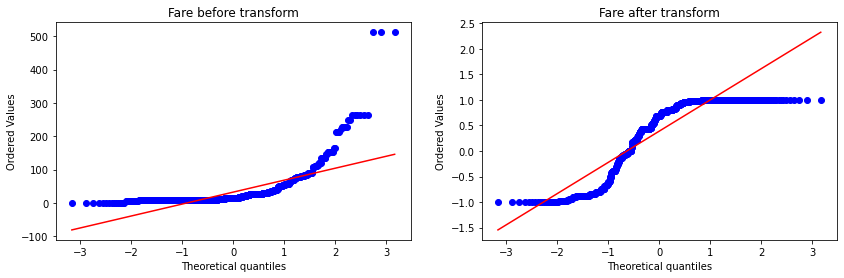

In [91]:
apply_transformation(np.sin)

# Square transform

Accuracy 0.6442446941323345


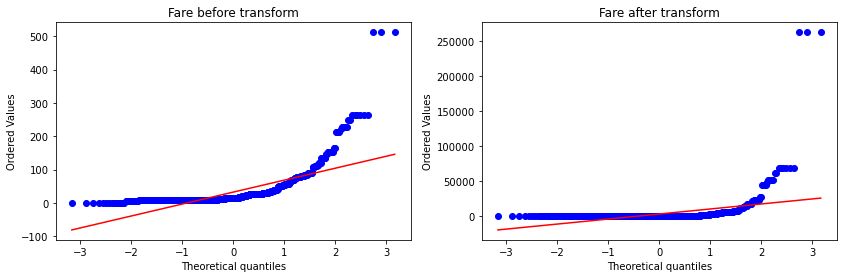

In [93]:
apply_transformation(lambda x: x**2)

# SQUARE ROOT TRANSFORM

Accuracy 0.6589013732833957


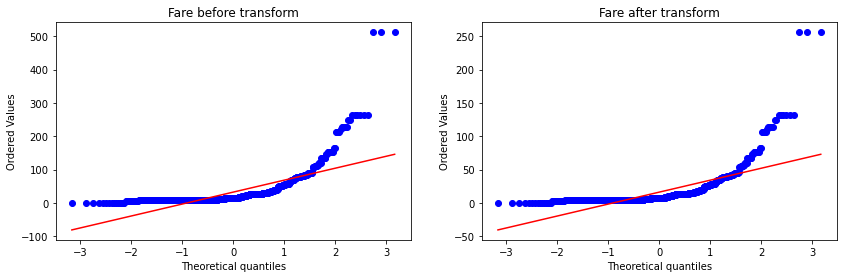

In [97]:
apply_transformation(lambda x:x**1/2)

# Reciprocal transform

Accuracy 0.61729088639201


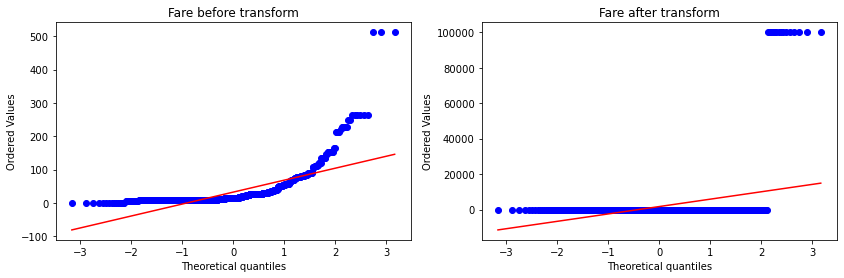

In [96]:
apply_transformation(lambda x: 1/(x+0.00001))